#This project will be for the purpose of evaluating loan default risk from a dataset of borrowers. This dataset was taken from Kaggle and originated from Coursera's loan default prediction challenge. I will be looking at factors such as loan amount, DTI, income, and credit scores, and current debt to make the prediction of loan default risk. 

In [22]:
#Importing the needed libraries to get started

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [23]:
#Importing the dataset

df = pd.read_csv("Loan_default.csv")

In [24]:
#Reading the dataset to get a sample of the data. 

df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Lets make note that the default column will be our target since we are trying to determine default risk with this data.

In [25]:
#Checking all of our datatypes.

df.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

The datatypes are showing me which features I would need to convert for the model. We need to make some of these numerical.  Let's convert them.

In [26]:
#Converting categorical to numerical 

from sklearn.preprocessing import LabelEncoder

var_mod =['LoanID','Education','EmploymentType', 'MaritalStatus','HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
var_mod = [col for col in var_mod if col in df.columns]
 
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

LoanID              int32
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int32
EmploymentType      int32
MaritalStatus       int32
HasMortgage         int32
HasDependents       int32
LoanPurpose         int32
HasCoSigner         int32
Default             int64
dtype: object

In [27]:
#Checking for missing values that we may not need to use

df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [28]:
df.info()  #looking to see all the features (columns) available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  int32  
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  int32  
 11  EmploymentType  255347 non-null  int32  
 12  MaritalStatus   255347 non-null  int32  
 13  HasMortgage     255347 non-null  int32  
 14  HasDependents   255347 non-null  int32  
 15  LoanPurpose     255347 non-null  int32  
 16  HasCoSigner     255347 non-null  int32  
 17  Default   

No missing values in this dataset so I wont need to drop any of the columns. 

In [29]:
#Checking for duplicates

df.duplicated().sum()

0

In [30]:
#Looking at some statistics about the data

df.describe()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,127673.000000,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108,0.116128
std,73712.473931,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.320379
min,0.000000,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63836.500000,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,127673.000000,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,191509.500000,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,255346.000000,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


What Im looking for in the summary statistics is potential outliers.  The difference between the mean and max on most of these arent bad. Loan amount is the only one that seems to have the biggest difference but that might be due to the loan purpose.  Let's explore that a bit more. 

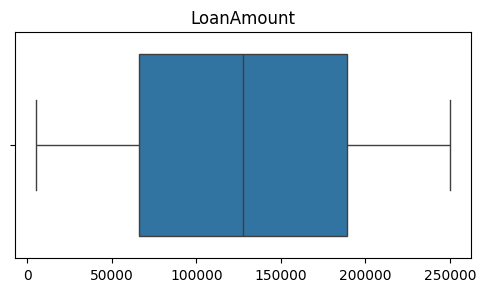

In [31]:
#Visualizing the outliers

variables=['LoanAmount']

plt.figure(figsize=(20, 10))
ind=1
for  variable in (variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df[variable])
    plt.title(variable)
    ind+=1
    plt.xlabel('')

plt.show()

Looks pretty good to me. Dont see anything making it off balance. 

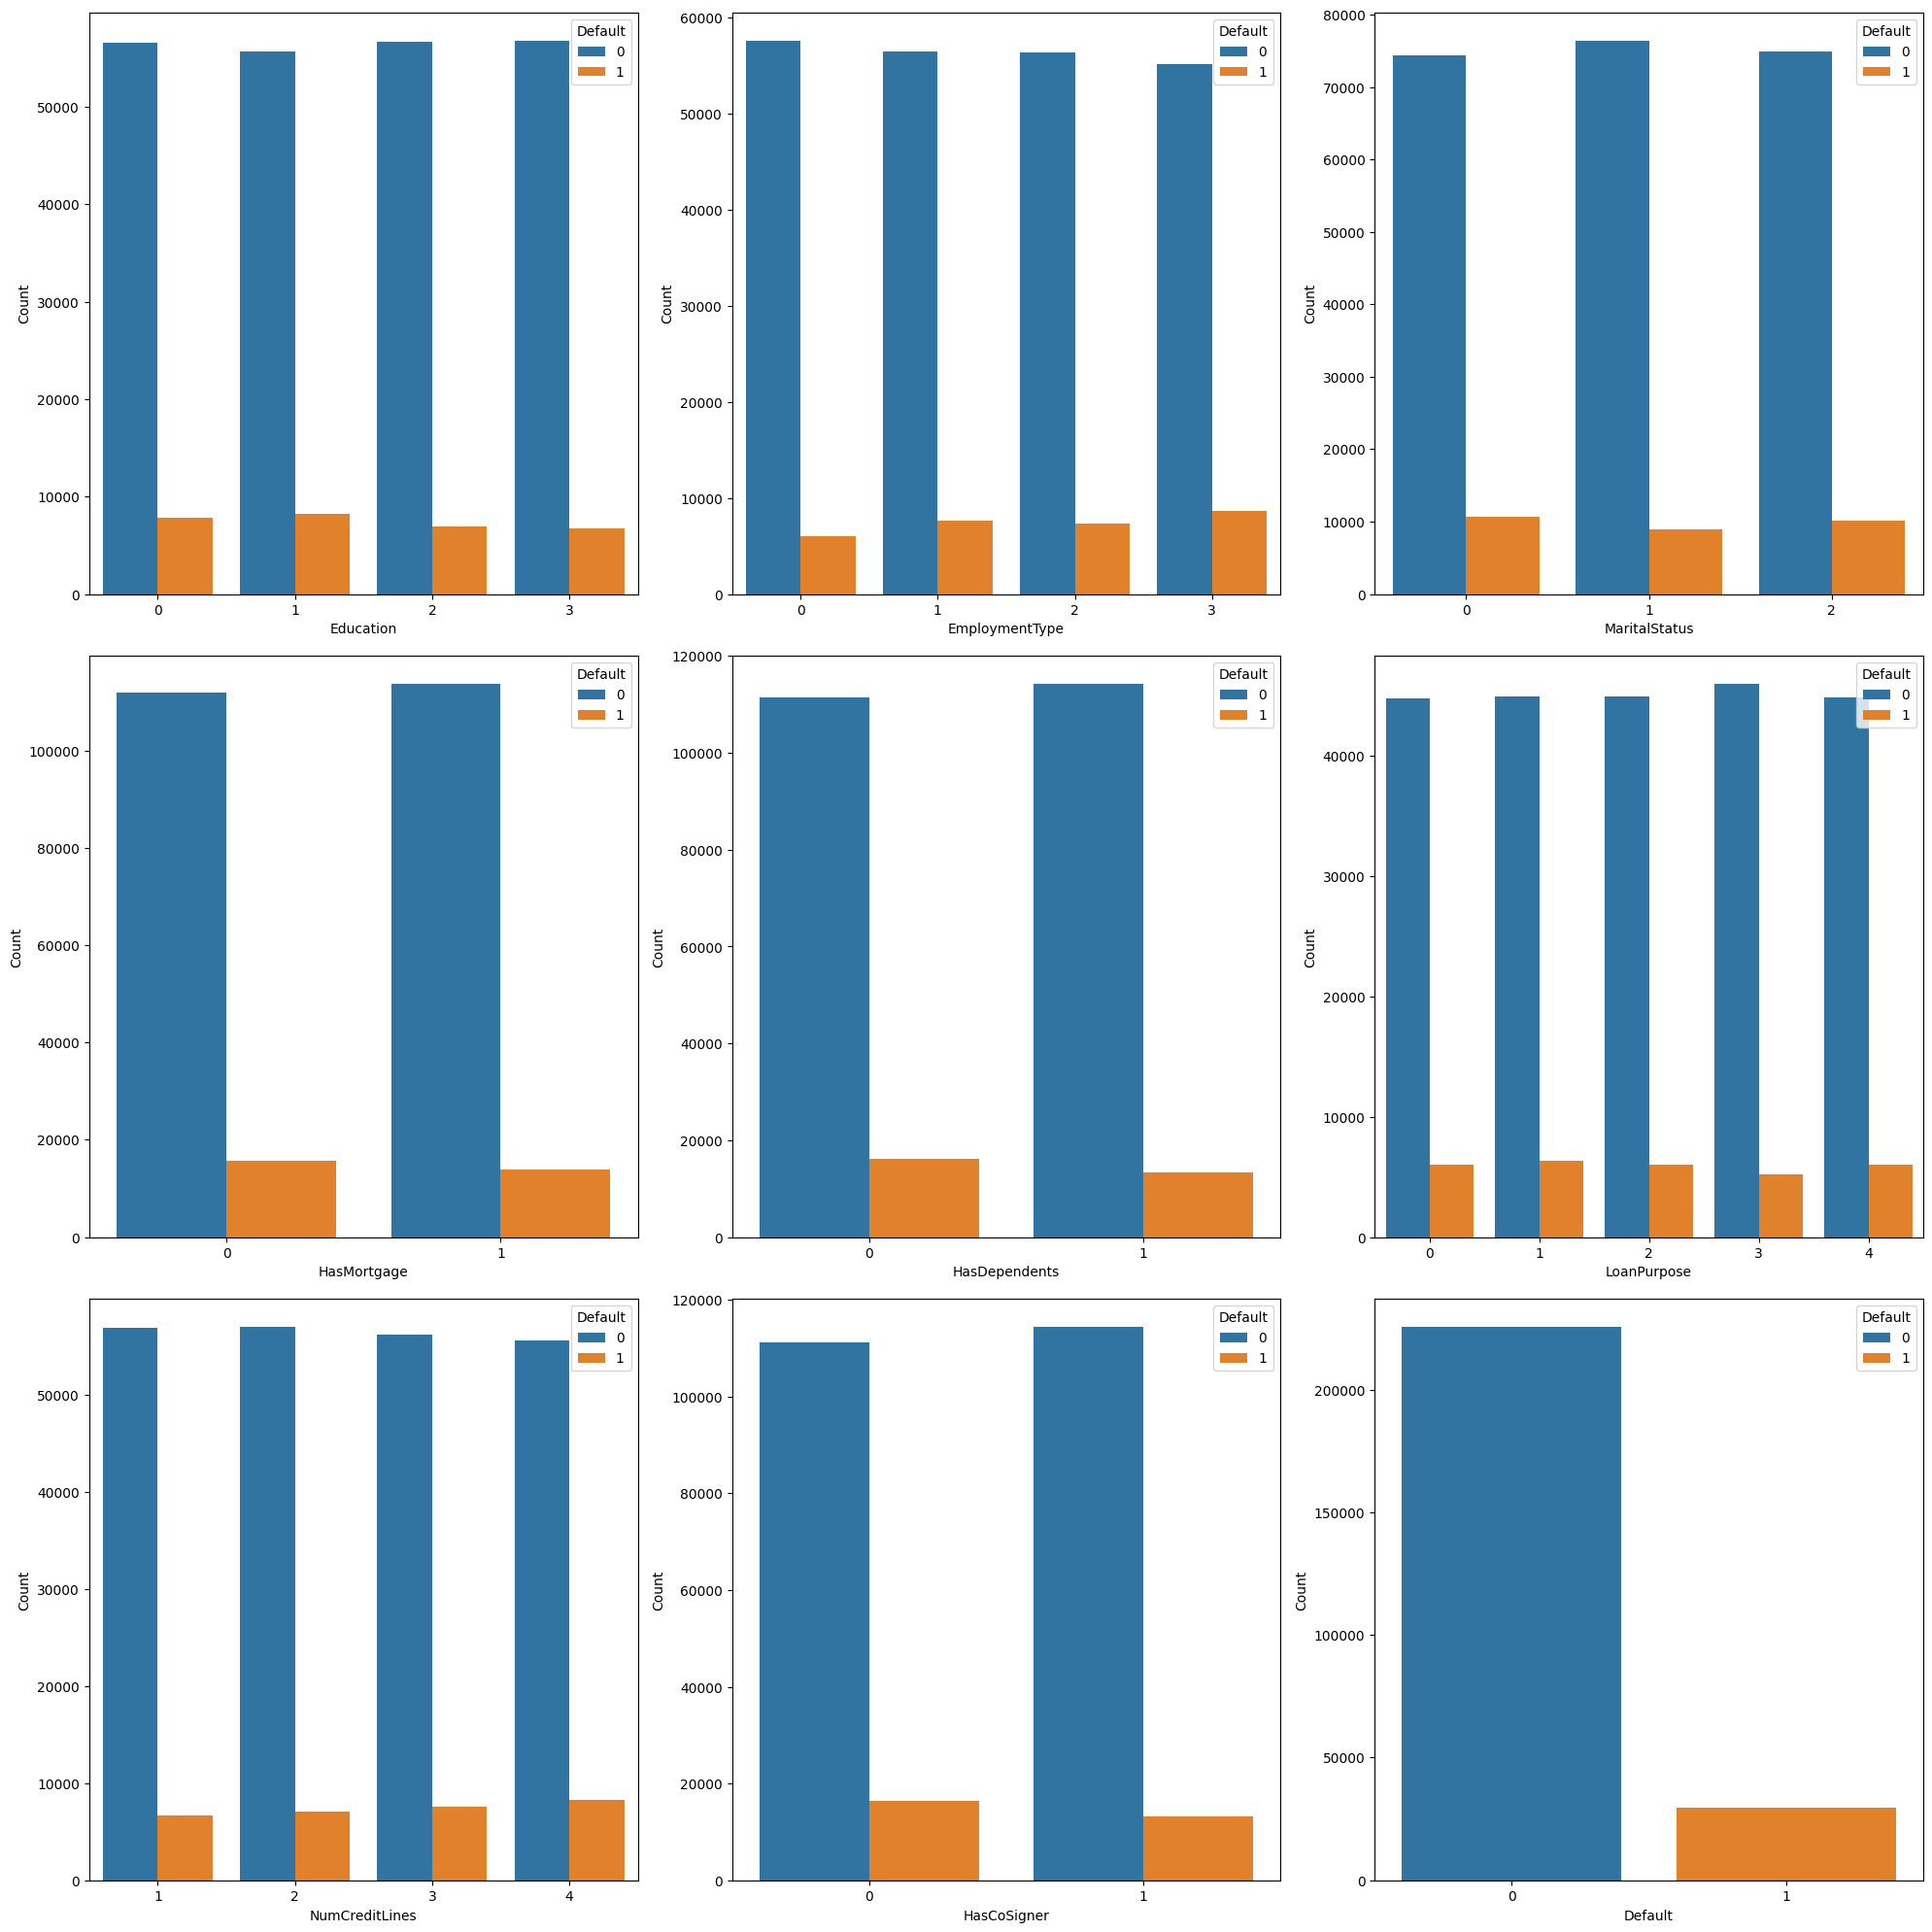

In [32]:
#Plotting to see all the variables and see the comparison with the target.

variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
                       'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default',
                       'Age', 'Income', 'LoanAmount', 'CreditScore', 
                       'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio']

plt.figure(figsize=(20, 20))
ind=1
for variable in variables[:9]:
    plt.subplot(3,3,ind)
    sns.countplot(x=df[variable],hue=df["Default"])
    plt.ylabel('Count')
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

This is interesting.  Theres only one currently in default and when you look at the comparison,  you can see that this one had a higher number of credit lines, didnt have a co-signer, and unemployed. 

In [33]:
#Splitting data into training and test sets

#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df.drop('Default', axis=1)
y = df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [34]:
#Create decision tree classifier

dt_classifier = DecisionTreeClassifier(random_state=42)

In [35]:
# Training the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

In [37]:
#Evaluate the accuracy of the model
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.8014685725474838


In [38]:
#Evaluate using classification report to show precision, recall and F1 score)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     44997
           1       0.21      0.24      0.22      6073

    accuracy                           0.80     51070
   macro avg       0.55      0.56      0.55     51070
weighted avg       0.81      0.80      0.81     51070



In [39]:
#Looking at all the feature names

df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

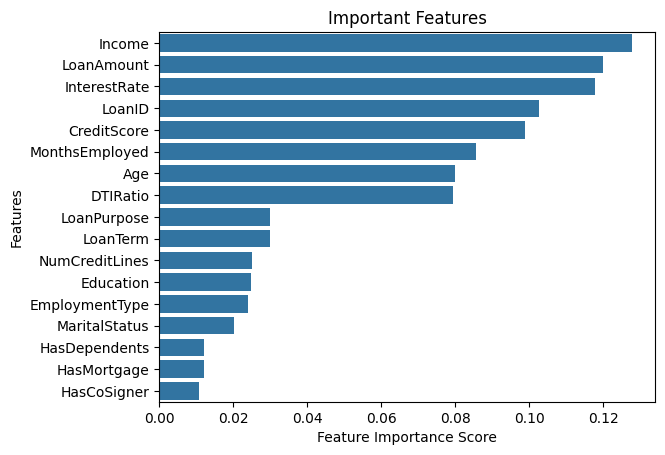

In [40]:
feature_imp = pd.Series(dt_classifier.feature_importances_, index=df.columns[:17]).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

Based on this observation,  Income, Loan amount, and Interest rate are key factors in predicting loan default. 

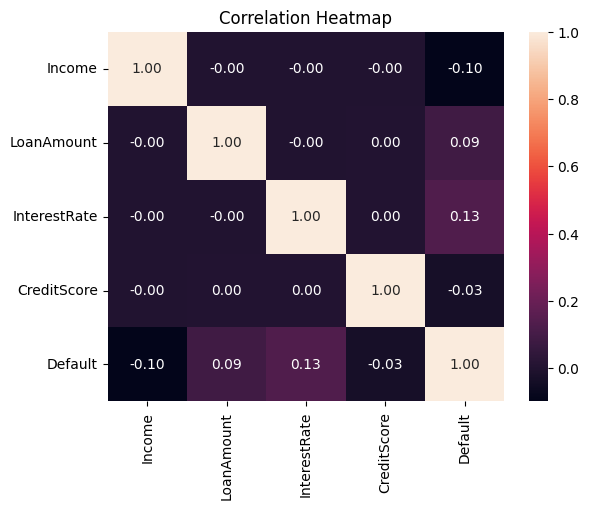

In [41]:
#Let's visuaize using correlation matrix

correlation_matrix = df[['Income', 'LoanAmount', 'InterestRate', 'CreditScore','Default']].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

I decided to plot the features of greatest importance to the matrix. 

*Default and interest rate positively correlated. Meaning if interest rate goes up so does default risk. Interest rate had the highest correlation with .13

*Default and income negatively correlated.  This means if income is lower, default risk is higher. This is the 2nd highest correlation.

*Default and loan amount positively correlated. If loan amount goes up,  so does default risk.

Its interesting that credit score didnt have a higher correlation. That could be because either the credit scores were all relatively the same in the data.

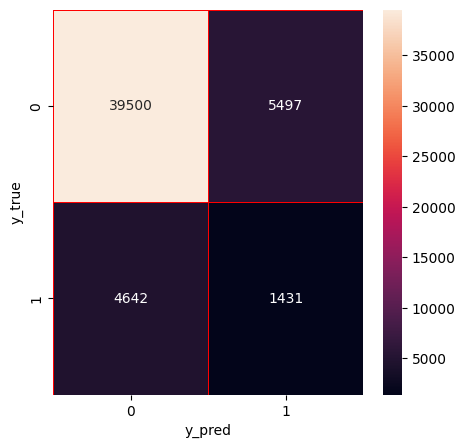

In [63]:
from sklearn.metrics import confusion_matrix

y_pred=dt_classifier.predict(X_test)
y_true=y_test

cm=confusion_matrix(y_true,y_pred)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Top left quadrant = True Positives = 39,500

Bottom right quadrant = True Negatives = 1431

Top right quadrant = False Positives = 5497

Bottom left quadrant = False Negatives = 4642

This is telling me that the model performed the right answer 40,931 times and predicted wrong only 10,139

In [67]:
#Let's see how random forest performs

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100)


In [68]:
# Training the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [69]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [70]:
print(metrics.accuracy_score(y_test, y_pred))

0.8838652829449775


Im seeing here that random forest model is actually the better predictor. 

Going to visualize the results for RF the same way I did for decision tree classifier. 

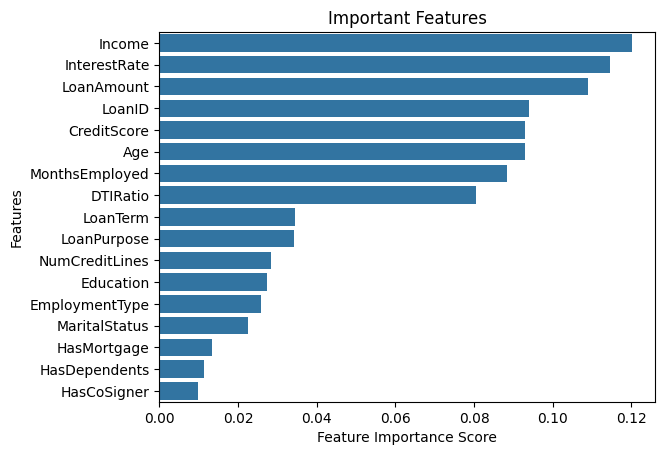

In [71]:
feature_imp = pd.Series(rf_classifier.feature_importances_, index=df.columns[:17]).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

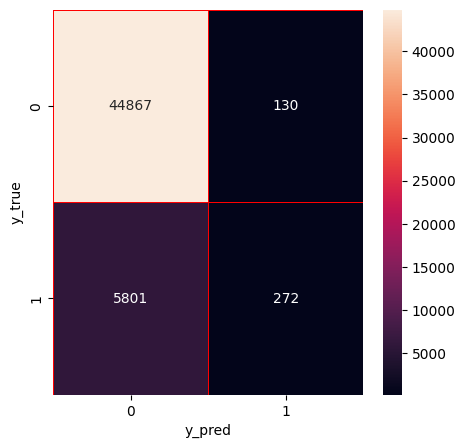

In [73]:
#Confusion matric with Random Forest. 

y_pred=rf_classifier.predict(X_test)
y_true=y_test

cm=confusion_matrix(y_true,y_pred)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Much better results! 

Top left quadrant = True Positives = 44,867

Bottom right quadrant = True Negatives = 130

Top right quadrant = False Positives = 5801

Bottom left quadrant = False Negatives = 272

This is telling me that the model performed the right answer 44,997 times and predicted wrong only 6073 times